In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from tqdm import tqdm

from utils import *

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns

/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


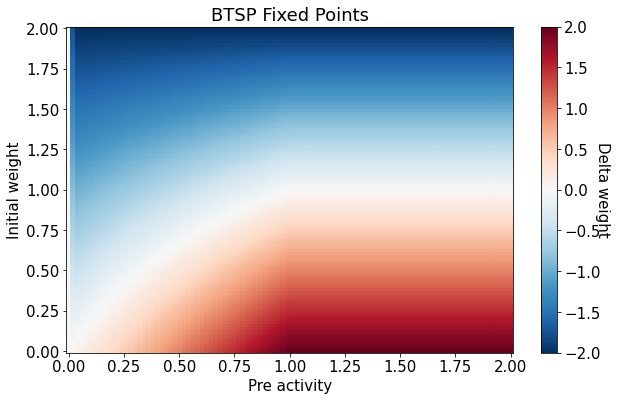

In [2]:
plot_btsp()

init bias = tensor([-0.1549,  0.1427])


100%|██████████| 300/300 [00:00<00:00, 507.54it/s]


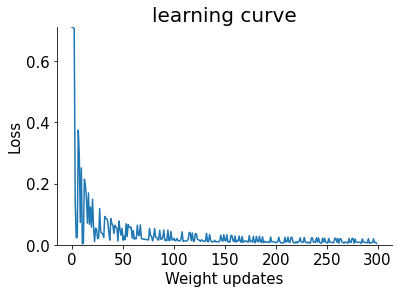

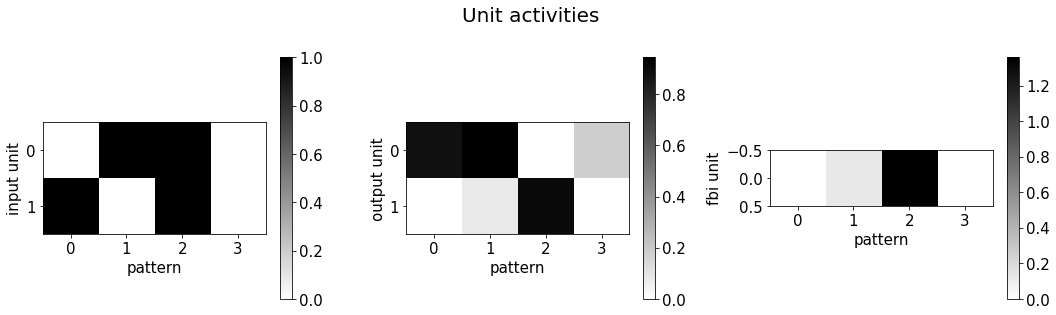

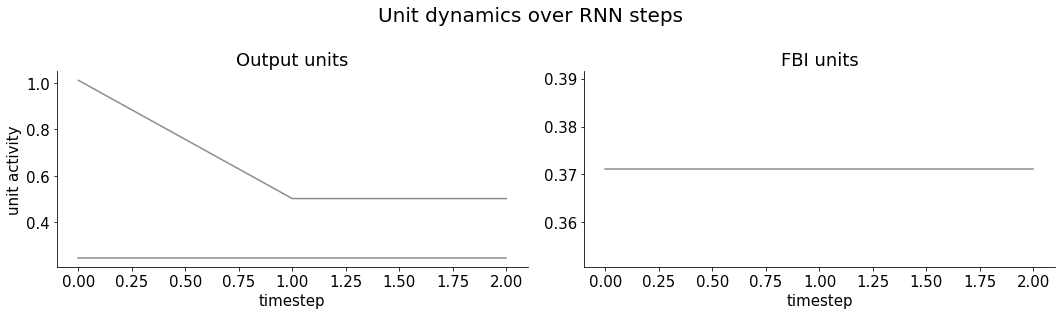

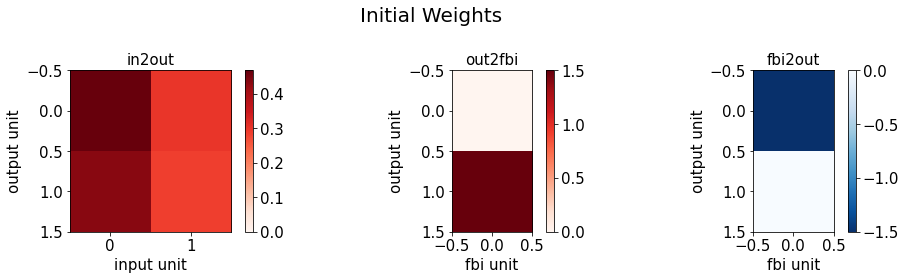

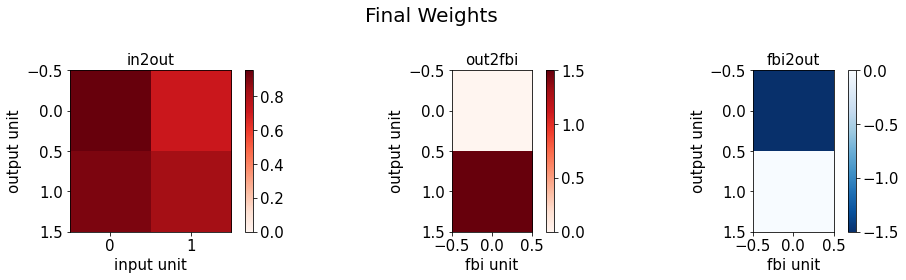

final bias = tensor([ 0.1772, -0.8276])


In [3]:
torch.manual_seed(42)

# Initialize BTSP RNN
input_size = 2
output_size = 2
fbi_size = 1
bias = True

model = FBI_RNN(input_size, output_size, fbi_size, bias, rule='btsp')

if hasattr(model.in2out,'bias'):
    print(f'init bias = {model.in2out.bias.detach()}')
    
# Train network
num_epochs = 300
num_timesteps = 3
eval_step = 2
lr = 0.1
all_patterns = torch.tensor([[0., 1.],
                             [1., 0.],
                             [1., 1.],
                             [0., 0.]])

all_targets  = torch.tensor([[1., 0.],
                             [1., 0.],
                             [0., 1.],
                             [0., 0.]])

data = model.train_btsp(lr, num_epochs, num_timesteps, eval_step, all_patterns, all_targets)

all_patterns, output_history, fbi_history, loss_history, weight_history = data

plt.plot(loss_history)
plt.xlabel('Weight updates')
plt.ylabel('Loss')
plt.ylim([0,torch.max(loss_history)])
plt.title('learning curve',fontsize=20)
sns.despine()
plt.show()

epoch = -1
time = eval_step
plot_summary(time,epoch,data)
if hasattr(model.in2out,'bias'):
    print(f'final bias = {model.in2out.bias.detach()}')

In [4]:
# W = torch.tensor([[-1.5000],
#                   [-0.0000]])

# fbi = torch.tensor([0.2])
# output = torch.tensor([0.,0.1])

# target = torch.tensor([1.,0.])

# btsp_step(W, fbi, output, target)[0]

tensor([[2.2000e+00, 1.6358e-02],
        [4.0000e-01, 8.0000e-04]], dtype=torch.float64)